<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left"/>
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.876 · Análisis de grafos y redes sociales</p>
<p style="margin: 0; text-align:right;">Máster universitario de Ciencia de datos (<i>Data Science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# Importación y exportación de grafos

Aunque NetworkX proporcione herramientas básicas (como se verá más abajo) para visualizar sus grafos, su objetivo principal es el análisis y no la visualización. Incluso es posible que en futuras versiones de NetworkX se elimine esa opción porque no es su foco.

Visualizar grafos de forma adecuada no es fácil, así que es mejor usar herramientas dedicadas a ello. Dos de las mejores opciones son:

- [Cytoscape](http://www.cytoscape.org/)
- [Gephi](https://gephi.org/)

Ambos permiten la importación de grafos creados en NetworkX, pero para ello tendremos que ver cómo se escriben (o guardan) grafos desde NetworkX (y su complementario, la lectura).

Existen más formatos y posibilidades, pero aquí exploraremos cinco:

- Listas de adyacencia (o *adjacency lists*)
- Listas de aristas (o *edge lists*)
- Matriz de adyacencia
- GraphXML
- Pajek

### *Adjacency list*

Es una forma muy simplista y que solo vale para nodos representables con *strings* y sin atributos adicionales ni en sus nodos ni en sus aristas. 

Vamos a ver su formato:

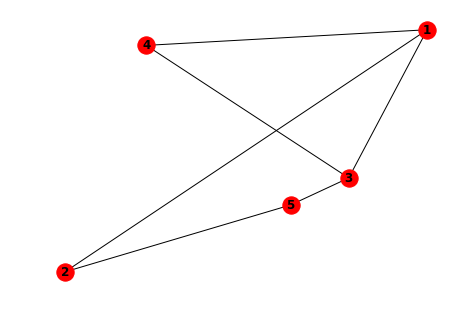

In [2]:
# Preparamos un grafo simple de ejemplo

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1, 2), (1, 3),(1, 4),(2, 5),(3, 4),(3, 5)])
nx.draw_random(G, with_labels=True, font_weight='bold')
plt.show()

In [3]:
# Escribimos la lista a un fichero

nx.write_adjlist(G,"test.adjlist")

Si lo abrimos descubriremos un fichero con varias líneas de comentarios (marcadas con #) y cinco líneas (una por nodo):

```
1 2 3 4
2 5
3 4 5
4
5
```

El primer nodo es el nodo origen y los siguientes son todos los nodos a los que conecta. La primera línea indica, por ejemplo, que existen las aristas (1,2), (1,3) y (1,4). Es preciso observar que solo aparecen las aristas una vez (es decir, (1,2) no vuelve a aparecer como (2,1)).

La operación contraria, leer, se haría con:
- nx.read_adjlist("test.adjlist").

Más información (y parámetros posibles) sobre adjlist [aquí](https://networkx.github.io/documentation/stable/reference/readwrite/adjlist.html), como cualquier función de NetworkX.


### Edge lists

Las listas de aristas tienen ventajas e inconvenientes, aunque son un formato bastante habitual. Aquí son las aristas las que se almacenan (*nodo_origen* *nodo_destino*) y sus correspondientes atributos a continuación, si procede, ya sea de forma arbitraria o como diccionario de Python. En cambio, no pueden almacenarse atributos del grafo o de sus nodos y tampoco hay forma de representar a los nodos aislados (a no ser que tengan un enlace reflexivo sobre sí mismos).

Vamos a ello:

In [4]:
# Añadimos algunos atributos al grafo G

G.add_edges_from([(1, 2, {'color': 'blue'}), (1, 3, {'weight': 8}),(3, 4, {'color': 'red', 'weight': 3})])

# Lo guardamos como edgelist

nx.write_edgelist(G,'test.edgelist')

# También hay opciones para no conservar los atributos
nx.write_edgelist(G,'test_no_data.edgelist',data=False)
# O sólo algunos
nx.write_edgelist(G,'test_color.edgelist',data=['color'])

Vemos que los resultados son los esperados en los tres ficheros creados:

**Test**
```
1 2 {'color': 'blue'}
1 3 {'weight': 8}
1 4 {}
2 5 {}
3 4 {'color': 'red', 'weight': 3}
3 5 {}
```
**Test sin atributos**
```
1 2
1 3
1 4
2 5
3 4
3 5
```
**Test solo con color**
```
1 2 blue
1 3
1 4
2 5
3 4 red
3 5

```

Más información (y parámetros posibles) sobre adjlist [aquí](https://networkx.github.io/documentation/stable/reference/readwrite/edgelist.html)


### Matriz de adyacencia

In [5]:
import numpy as np

a = nx.to_numpy_matrix(G)
# G = nx.from_numpy_matrix(a, create_using= nx.DiGraph())
a

matrix([[0., 1., 8., 1., 0.],
        [1., 0., 0., 0., 1.],
        [8., 0., 0., 3., 1.],
        [1., 0., 3., 0., 0.],
        [0., 1., 1., 0., 0.]])

### GraphXML

Aprovechando las ventajas de un sistema sintáctico "ordenado", el XML, GraphXML define una estructura común para representar, archivar o procesar casi cualquier tipo de gráfico. Funciona con una parte estructural que describe el núcleo del grafo y extensiones para los datos adicionales. La especificación concreta está disponible [en línea](http://graphml.graphdrawing.org/specification.html) y está pensada para ser un estándar común. Solo presenta algunos problemas con grafos mixtos (los que contengan una mezcla de aristas dirigidas y no dirigidas) aunque no son habituales.

Es, probablemente, el método más práctico para usarlo posteriormente en una herramienta externa, puesto que se entiende especialmente bien con Cytoscape, Gephi y similares.

Métodos:

In [6]:
# Seguimos con G al que hemos añadido atributos en el paso anterior
nx.write_graphml_lxml(G, "test.graphml")

# En NetworkX 2.0 se sugiere usar la versión superior, pero también es igualmente válida la anterior función:
nx.write_graphml(G, "test2.graphml")

El fichero obtenido es mucho más estructurado y con etiquetas:
```xml
<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
<key attr.name="weight" attr.type="long" for="edge" id="d1"/>
<key attr.name="color" attr.type="string" for="edge" id="d0"/>
<graph edgedefault="undirected"><node id="1"/>
<node id="2"/>
<node id="3"/>
<node id="4"/>
<node id="5"/>
<edge source="1" target="2">
  <data key="d0">blue</data>
</edge>
<edge source="1" target="3">
  <data key="d1">8</data>
</edge>
<edge source="1" target="4"/>
<edge source="2" target="5"/>
<edge source="3" target="4">
  <data key="d0">red</data>
  <data key="d1">3</data>
</edge>
<edge source="3" target="5"/>
</graph></graphml>
```
La lectura sería, a su vez, con *read_graphml*.

### Pajek

Por último, mencionar el formato Pajek (*araña* en esloveno), uno de los más antiguos y, por lo tanto, formato en el que pueden encontrarse almacenados muchos datos históricos o sets de muestra.

Su dinámica es parecida a las anteriores:

In [7]:
# Lo guardamos en Pajek
nx.write_pajek(G, "test.net")

Aquí se ve el contenido del fichero, que es algo más particular. Una lista de vértices y una lista de aristas con sus atributos. Nótese que los pesos que no están se han puesto a 1, que los atributos adicionales tienen nombre y valor, y que los atributos no usados están en los nodos.
```
*vertices 5
1 1 0.0 0.0 ellipse
2 2 0.0 0.0 ellipse
3 3 0.0 0.0 ellipse
4 4 0.0 0.0 ellipse
5 5 0.0 0.0 ellipse
*edges
1 2 1.0 color blue
1 3 8
1 4 1.0
2 5 1.0
3 4 3 color red
3 5 1.0
```

Leer sería tan sencillo como tener un fichero con el formato adecuado y usar *read_pajek()*.

### Otros formatos

Estos no son los únicos; existen opciones como las de sacar JSON con varias disposiciones disponibles y otros estándares, pero tampoco hay que olvidar la posibilidad de representar el grafo en una matriz de adyacencia. Estas matrices, no obstante, suelen contener muchos ceros y, por lo tanto, cierta ineficiencia, que se soluciona con el uso de las matrices dispersas.

## Plot básico

Como se ha dicho anteriormente, no entraremos demasiado en este punto porque el dibujo no es uno de los puntos fuertes de NetworkX (y es mucho más adecuado exportarlo y usarlo en entornos externos). Pero sí viene bien ver algunas funciones básicas para representar los ejemplos futuros de forma rápida.

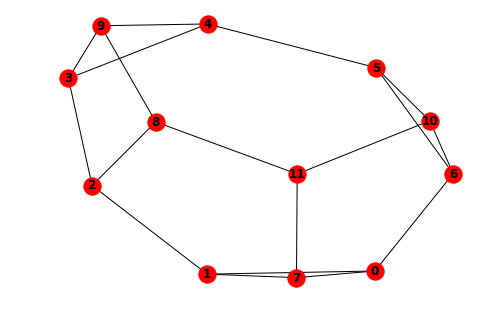

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Preparamos un grafo conocido, en este caso el Frucht.
H = nx.frucht_graph()

nx.draw(H, with_labels=True, font_weight='bold')
plt.show()

Pero cada vez que ejecutamos el código el grafo se dibuja de forma distinta, casi aleatoria. Vamos a ver algunas de las opciones de posicionamiento que hay:

| Nombre        | Efecto        |   
| ------------- |--------------|
| circular_layout    | En círculo |
| random_layout      | Aleatoriamente pero uniforme      |
| shell_layout      | Círculos concéntricos |
| spring_layout      | Usando el algoritmo de Fruchterman-Reingold      |

Hay más opciones, pero estas son probablemente las más sencillas (y *spring_layout* suele dar suficientemente buenos resultados para su uso).

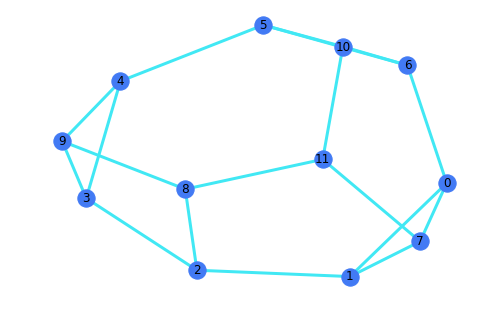

In [11]:
# Vamos a preparar pos (la posición) de los nodos, por ejemplo con spring_layout
pos = nx.spring_layout(H)

# Cambiamos la posición, pero también los colores y tamaños de arista
nx.draw(H, pos, node_color='#427af4', edge_color='#41e8f4', width=3, with_labels=True)
plt.show()

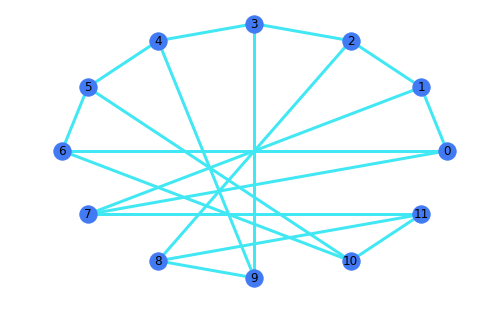

In [12]:
# Otras representaciones

# Circular
pos = nx.circular_layout(H)

# Cambiamos la posición, pero también los colores y tamaños de arista
nx.draw(H, pos, node_color='#427af4', edge_color='#41e8f4', width=3, with_labels=True)
plt.show()

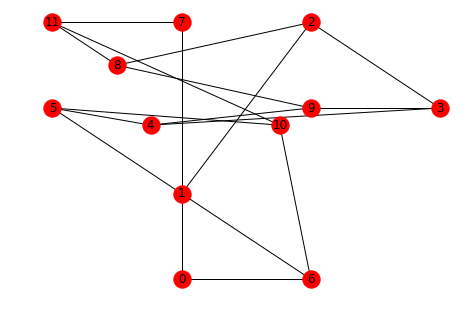

In [13]:
# Es posible también definir las posiciones manualmente

pos={0:(1,0),1:(1,1),2:(2,3),3:(3,2),4:(0.76,1.80),5:(0,2),
     6:(2,0),7:(1,3),8:(0.5,2.5),9:(2,2),10:(1.76,1.80),11:(0,3)} #node:(x,y)
nx.draw(H,pos=pos,with_labels=True)
plt.show()

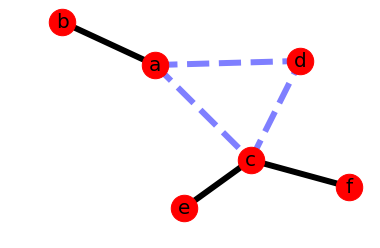

In [14]:
# Un ejemplo completo y útil con distintos tipos de aristas, pesos y colores
# Autor: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx

J = nx.Graph()

J.add_edge('a', 'b', weight=0.6)
J.add_edge('a', 'c', weight=0.2)
J.add_edge('c', 'd', weight=0.1)
J.add_edge('c', 'e', weight=0.7)
J.add_edge('c', 'f', weight=0.9)
J.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in J.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in J.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(J)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(J, pos, node_size=700)

# edges
nx.draw_networkx_edges(J, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(J, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(J, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()